# Test topo_map
This notebook is used to explore the topo_map() function in flovopy.asl.map

First, we import the modules we need, and set up some global variables we will need

In [ ]:
# --- Imports & paths ---
import os
from pathlib import Path
import itertools
from datetime import datetime

import numpy as np
from obspy import read_inventory, UTCDateTime

from flovopy.asl.map import topo_map  # your function


PROJECTDIR = "/Users/GlennThompson/Dropbox/BRIEFCASE/SSADenver"
LOCALPROJECTDIR = "/Users/GlennThompson/work/PROJECTS/SSADenver_local"
OUTPUT_DIR = f"{LOCALPROJECTDIR}/asl_notebooks"
INVENTORY_XML = f"{PROJECTDIR}/MV.xml"
INVENTORY_XML = f"/Users/glennthompson/Dropbox/MV_Seismic_and_GPS_stations.xml"
#DEM_TIF_FOR_BMAP = f"{PROJECTDIR}/channel_finder/02_dem_flipped_horizontal.tif"
DEM_TIF_FOR_BMAP = Path("/Users/glennthompson/Dropbox/PROFESSIONAL/DATA/wadgeDEMs/auto_crs_fit_v2/wgs84_s0.4_3_clean.tif")
DEM_DEFAULT = Path(PROJECTDIR) / "wgs84_s0.4_3_clean_shifted.tif"
DEM_DEFAULT = Path("/Users/glennthompson/Dropbox/MONTSERRAT_DEM_WGS84_MASTER.tif")

# Montserrat default region (lon_min, lon_max, lat_min, lat_max)
from flovopy.core.mvo import REGION_DEFAULT, dome_location
print(REGION_DEFAULT)
print(dome_location)

# Output folder
RUN_TAG = UTCDateTime().strftime("topo_map_test_%Y%m%dT%H%M%S")
OUTDIR = Path(OUTPUT_DIR) / RUN_TAG
OUTDIR.mkdir(parents=True, exist_ok=True)

# Load inventory
INV = read_inventory(INVENTORY_XML)
print(INV)

# Show help for the topo_map() function
help(topo_map)

(-62.255, -62.135, 16.66, 16.84)
{'lat': 16.71111, 'lon': -62.17722, 'elev': 1000.0}
Inventory created at 2025-10-03T19:10:01.654580Z
	Created by: ObsPy 1.4.2
		    https://www.obspy.org
	Sending institution: Merged and patched by merge_inventories()
	Contains:
		Networks (1):
			MV
		Stations (16):
			MV.MBBE (AUTO_NAME_MBBE)
			MV.MBBY (AUTO_NAME_MBBY)
			MV.MBFL (AUTO_NAME_MBFL)
			MV.MBFR (AUTO_NAME_MBFR)
			MV.MBGA (AUTO_NAME_MBGA)
			MV.MBGB (AUTO_NAME_MBGB)
			MV.MBGE (AUTO_NAME_MBGE)
			MV.MBGH (AUTO_NAME_MBGH)
			MV.MBHA (AUTO_NAME_MBHA)
			MV.MBLG (AUTO_NAME_MBLG)
			MV.MBLY (AUTO_NAME_MBLY)
			MV.MBRV (AUTO_NAME_MBRV)
			MV.MBRY (AUTO_NAME_MBRY)
			MV.MBSH (AUTO_NAME_MBMH)
			MV.MBSS (AUTO_NAME_MBSS)
			MV.MBWH (AUTO_NAME_MBWH)
		Channels (77):
			MV.MBBE..BHZ, MV.MBBE..BHN, MV.MBBE..BHE, MV.MBBY..BHZ, 
			MV.MBBY..BHN, MV.MBBY..BHE, MV.MBBY..HHZ, MV.MBBY..HHN, 
			MV.MBBY..HHE, MV.MBFL..EHZ, MV.MBFL..EHN, MV.MBFL..EHE, 
			MV.MBFR..HHZ, MV.MBFR..HHN, MV.MBFR..HHE, MV.MBGA..

# 2. Simple topo map of Montserrat

## 2.1 Coastline map

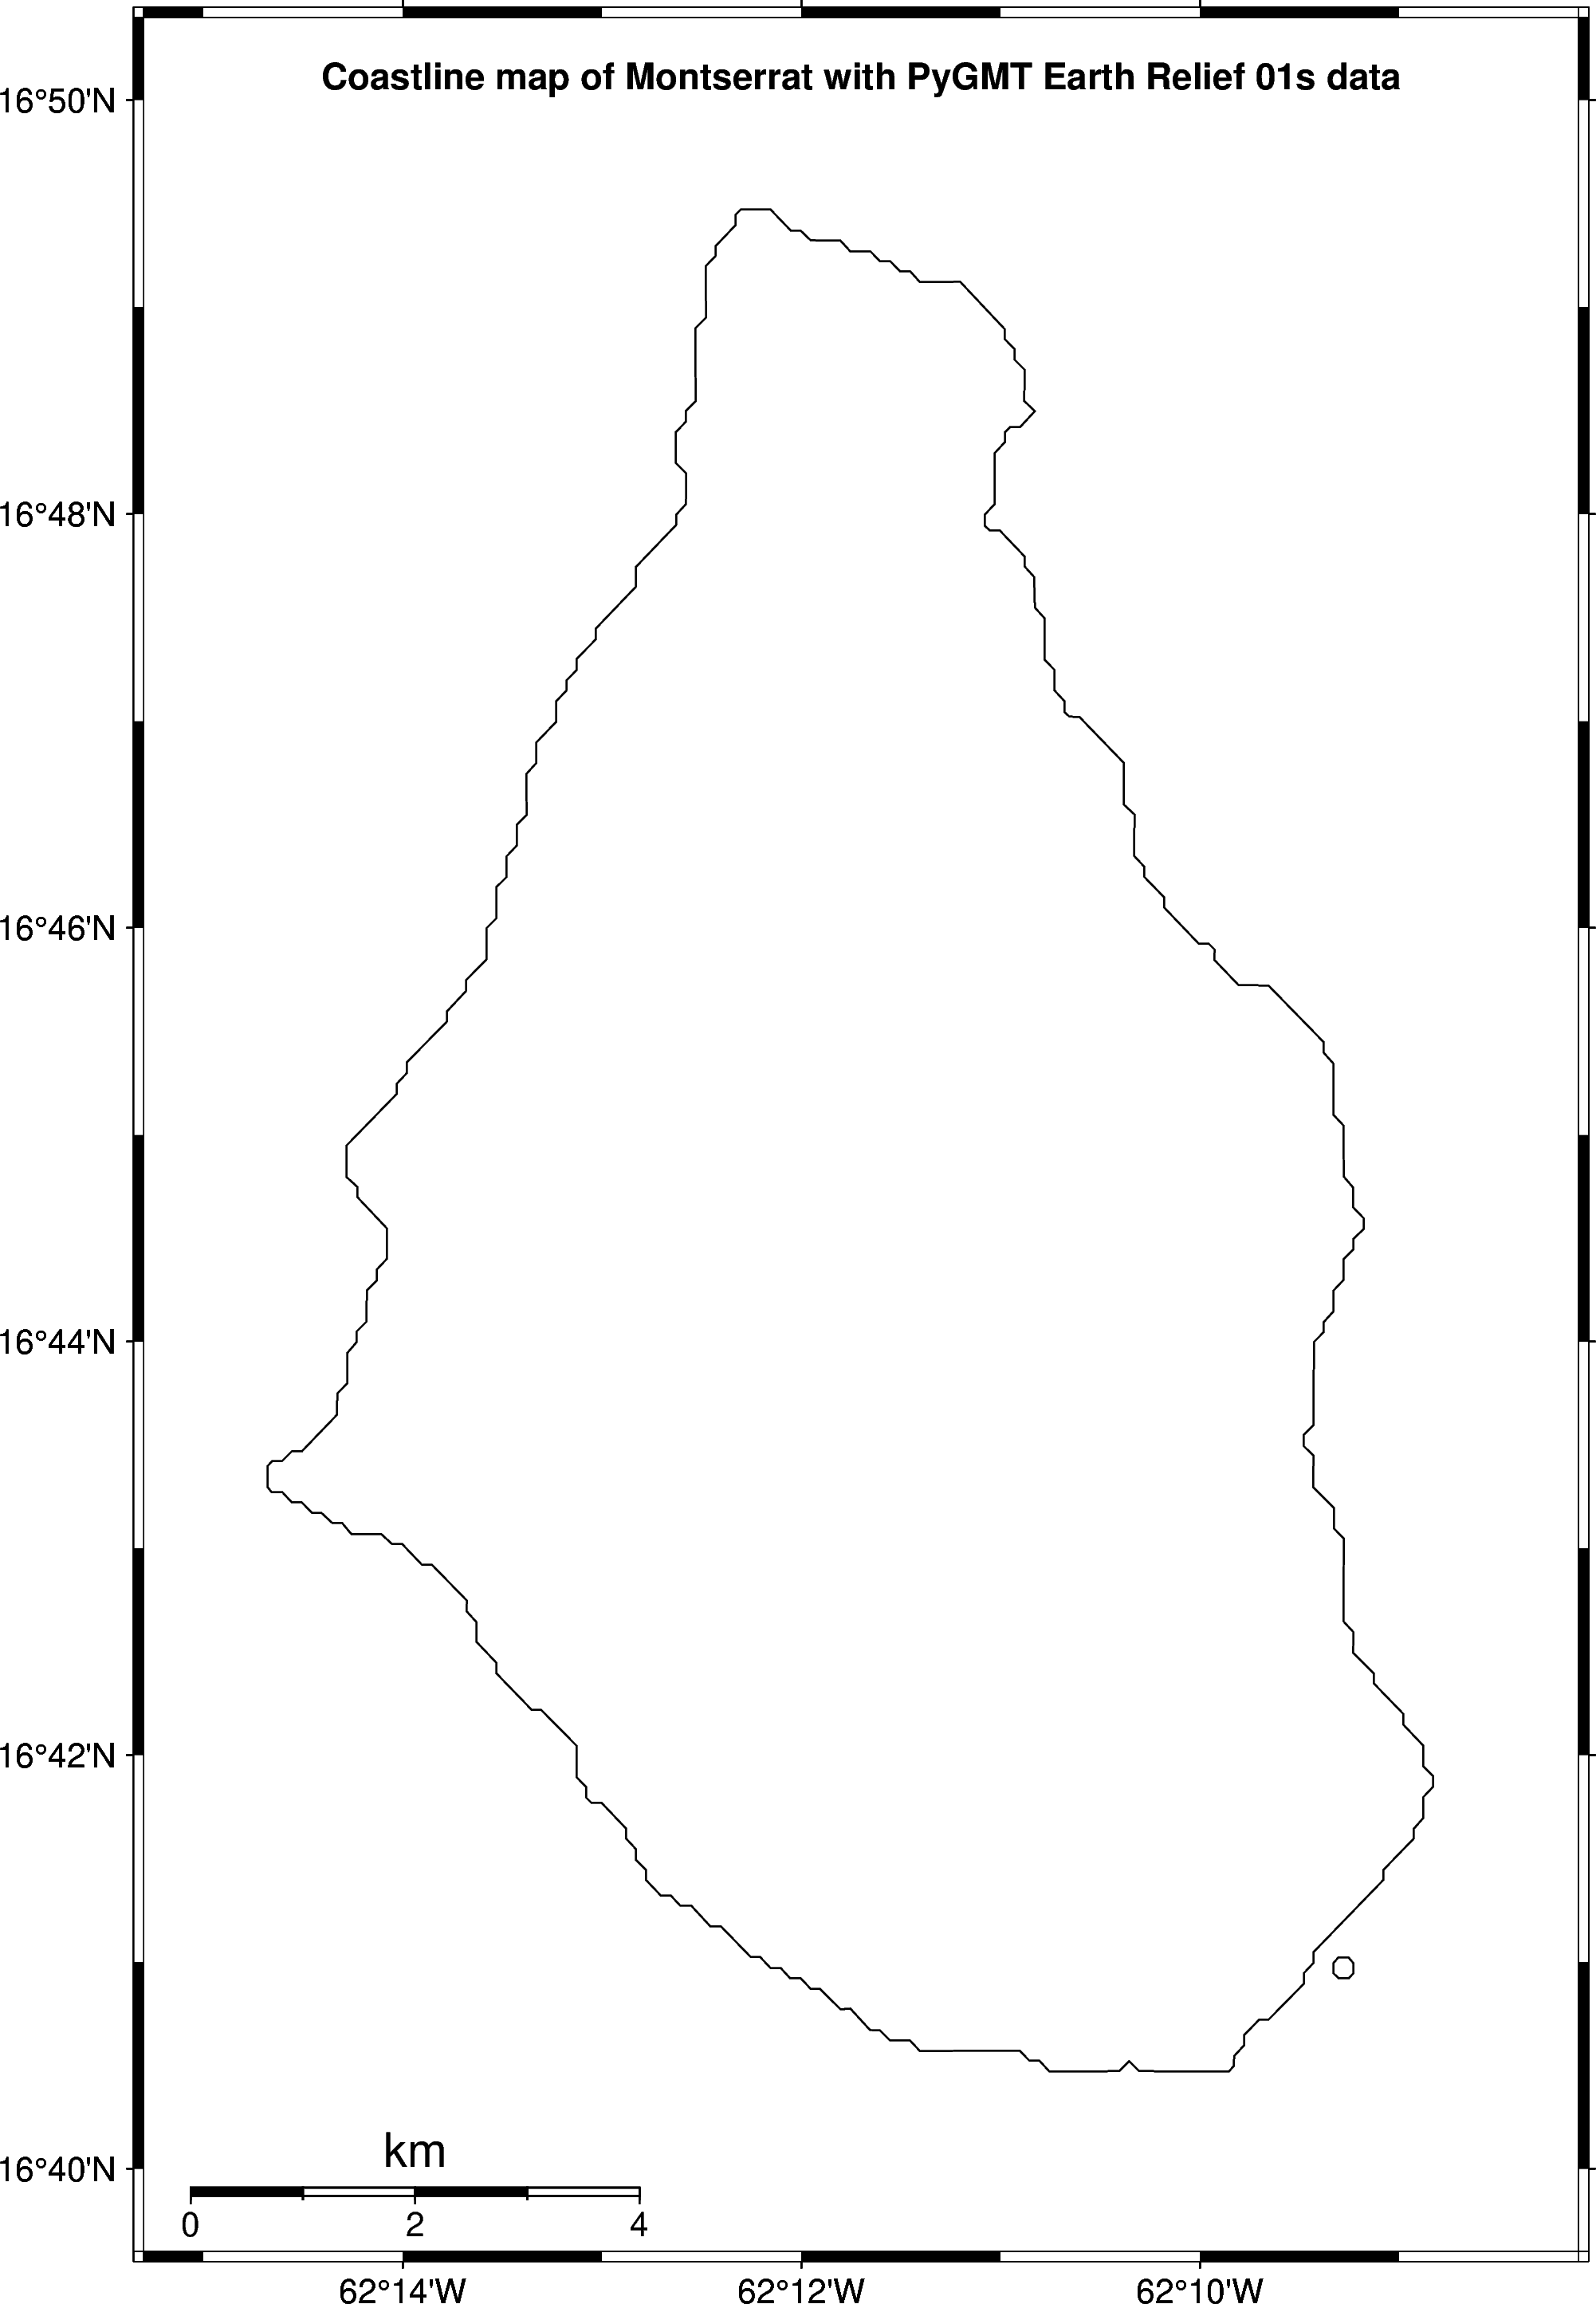

In [2]:
fig=topo_map(
    show=True,
    region=REGION_DEFAULT,
    title="Coastline map of Montserrat with PyGMT Earth Relief 01s data",
    add_topography=False,
)

## 2.2 Coastline with stations

/opt/anaconda3/envs/flovopy_plus/lib/python3.12/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


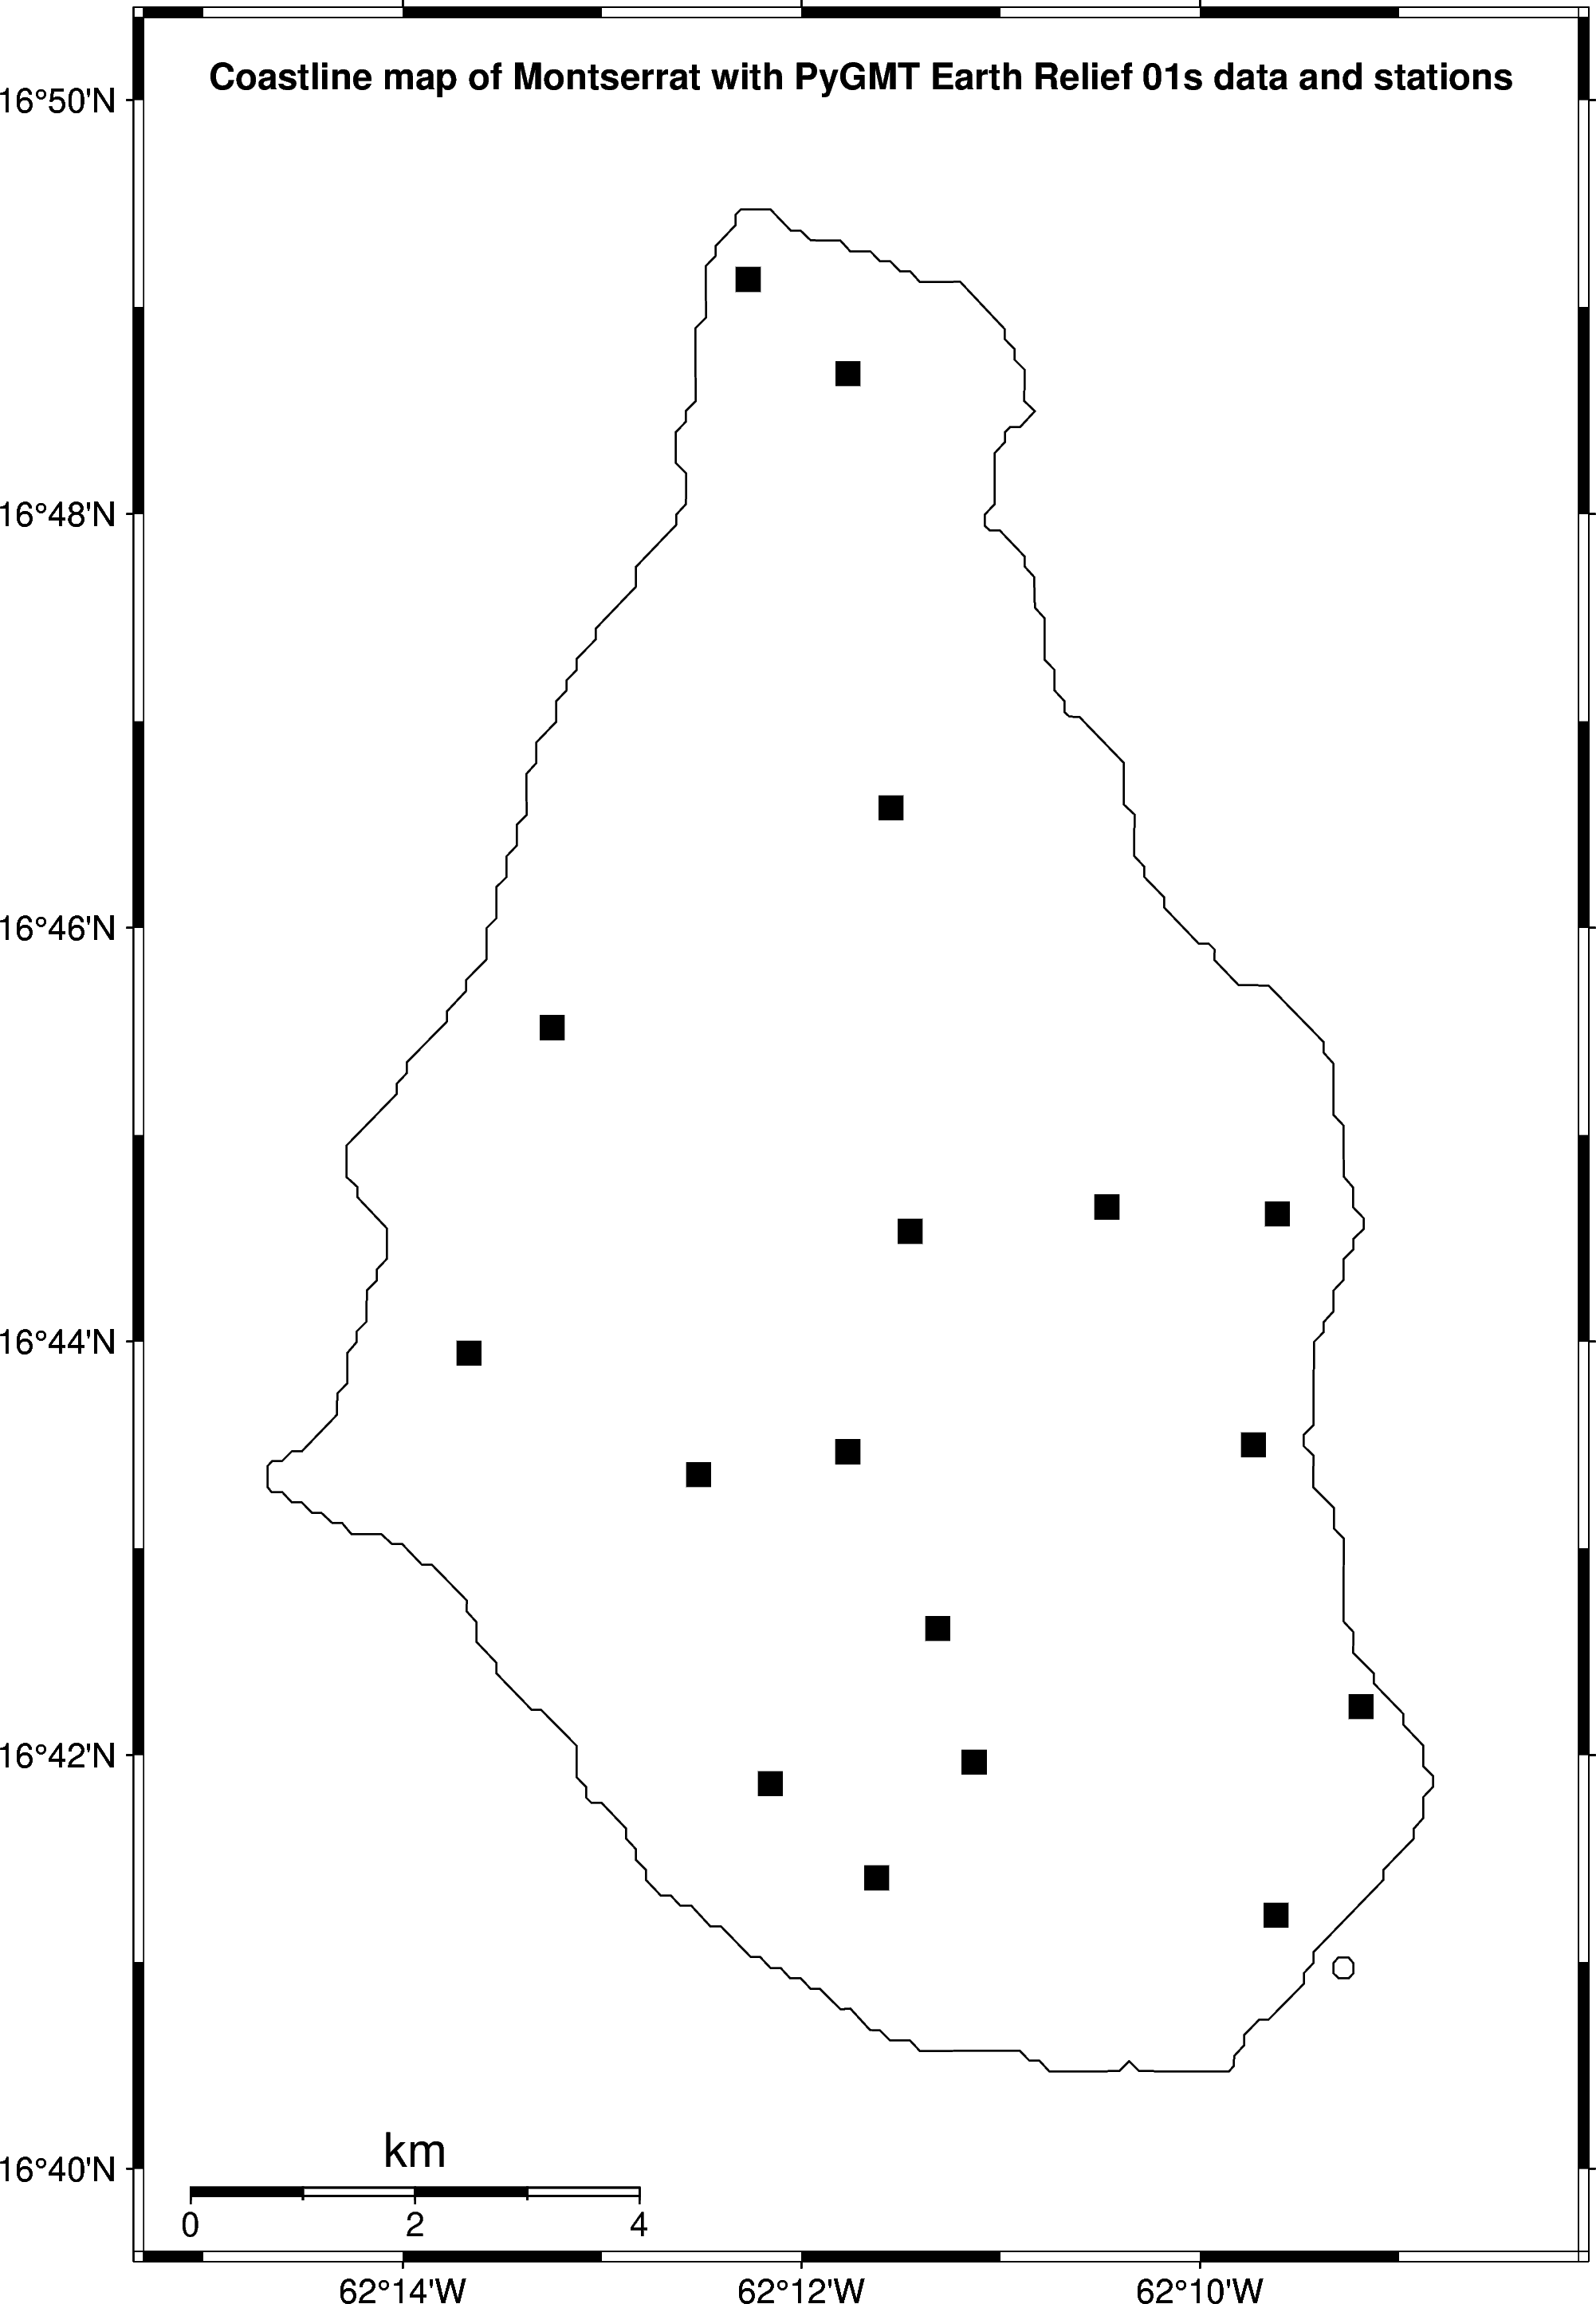

In [3]:
fig = topo_map(
    show=True,
    region=REGION_DEFAULT,
    title="Coastline map of Montserrat with PyGMT Earth Relief 01s data and stations",
    add_topography=False,
    inv = INV,
)

## 2.3 Add contours & dome location
We defined the dome location before

{'lat': 16.71111, 'lon': -62.17722, 'elev': 1000.0}


/opt/anaconda3/envs/flovopy_plus/lib/python3.12/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


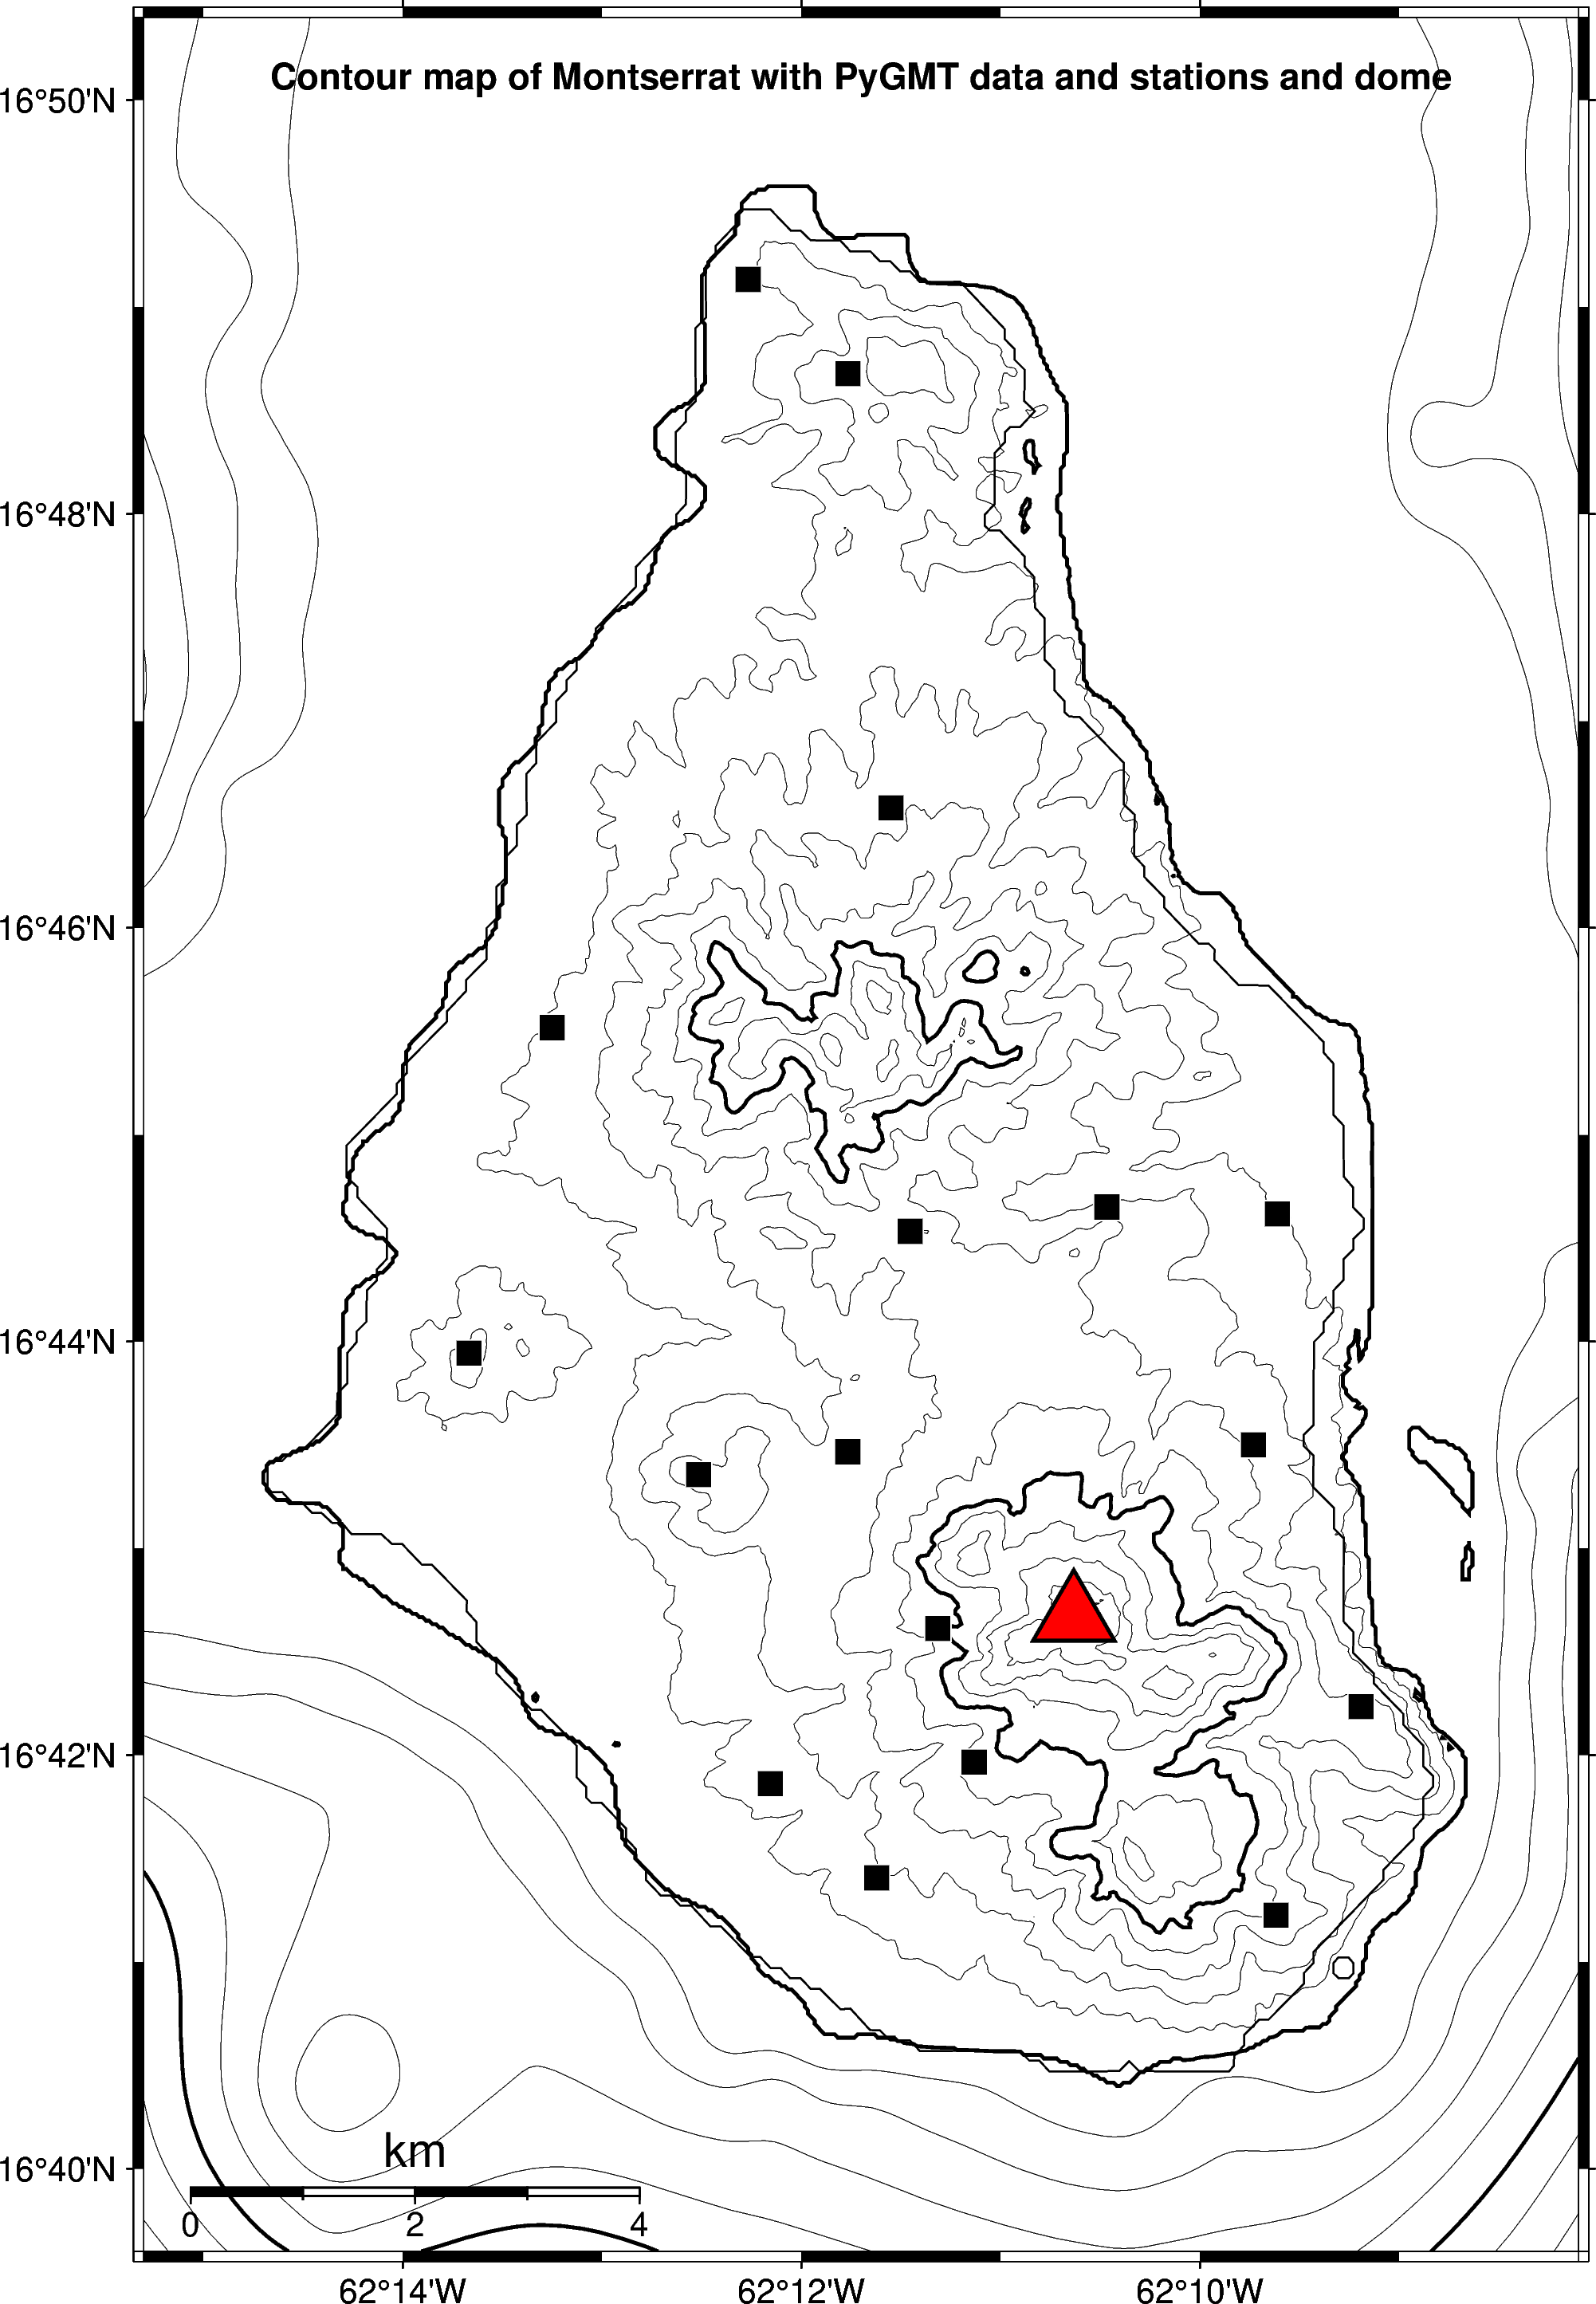

In [4]:
print(dome_location)
fig = topo_map(
    show=True,
    region=REGION_DEFAULT,
    title="Contour map of Montserrat with PyGMT data and stations and dome",
    add_topography=False,
    level_interval=100,
    inv = INV,
    dome_location=dome_location,
)

## 2.4 Add topography & station labels & colorbar

/opt/anaconda3/envs/flovopy_plus/lib/python3.12/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


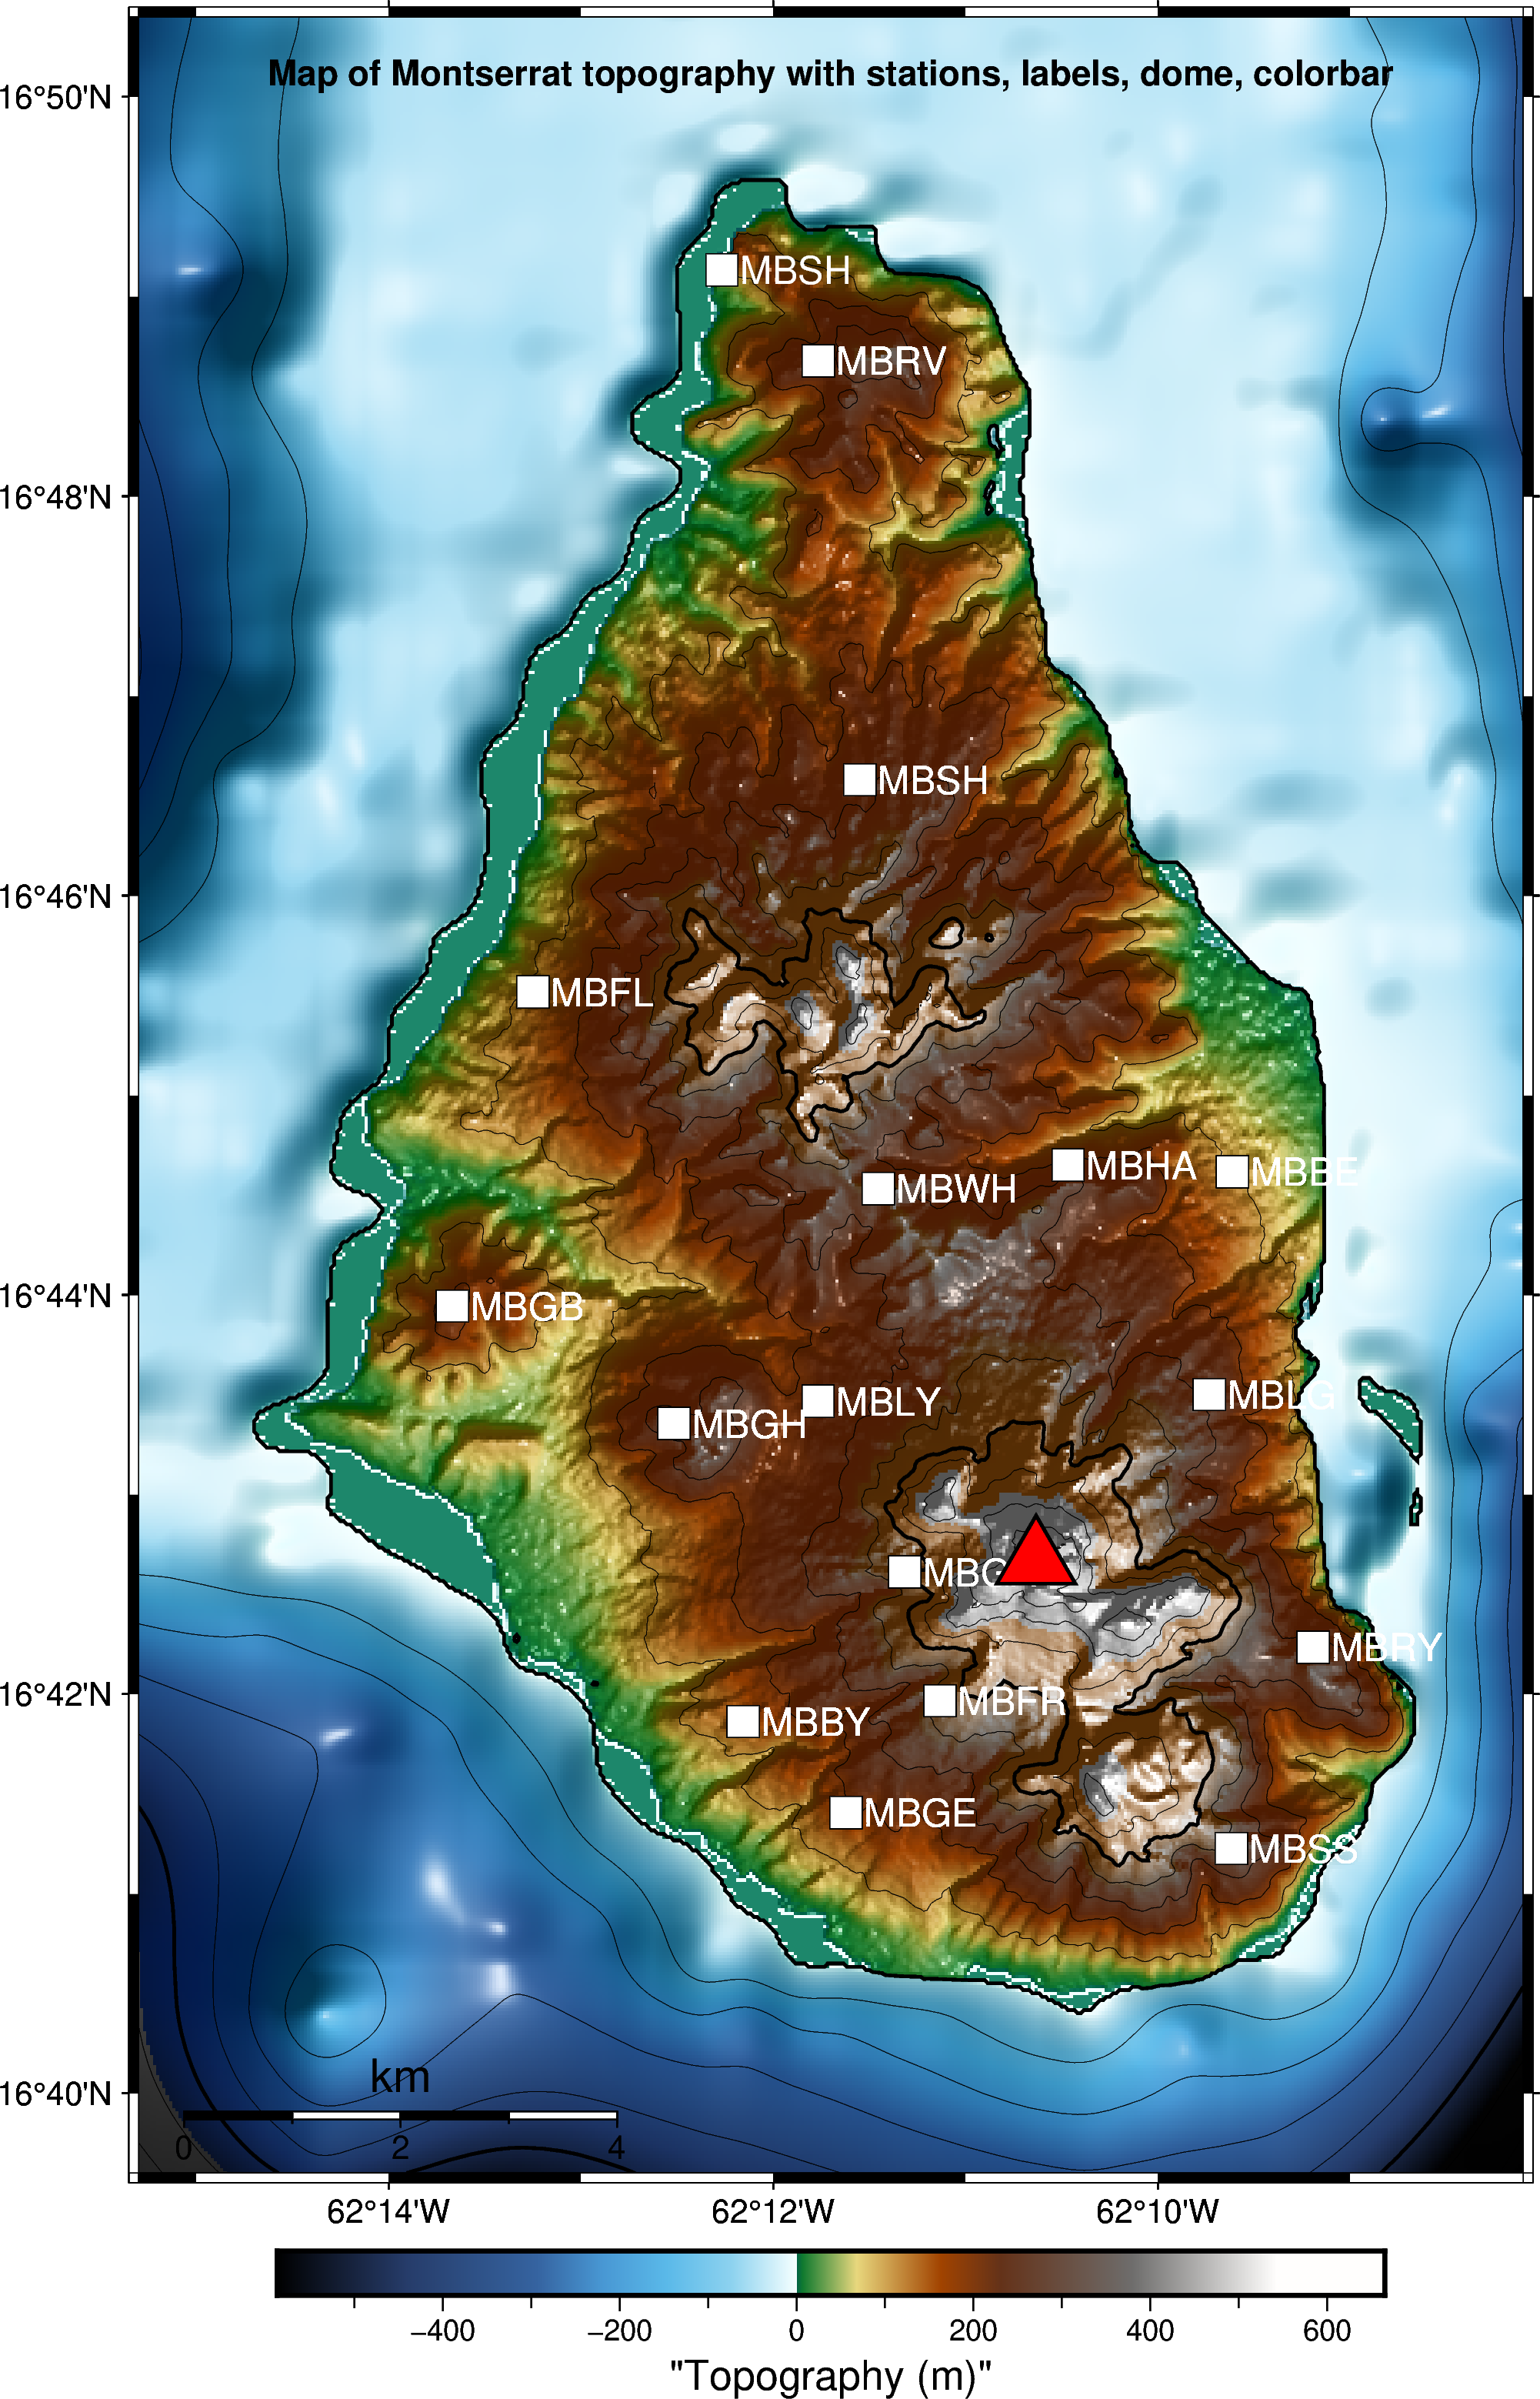

In [6]:
fig = topo_map(
    show=True,
    region=REGION_DEFAULT,
    title="Map of Montserrat topography with stations, labels, dome, colorbar",
    add_topography=True,
    level_interval=100,
    inv = INV,
    dome_location=dome_location,
    add_colorbar=True,
    add_labels=True,
)

## 2.5 Simplify!
That is a busy map! Let's use a grayscale instead, and remove contours

/opt/anaconda3/envs/flovopy_plus/lib/python3.12/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


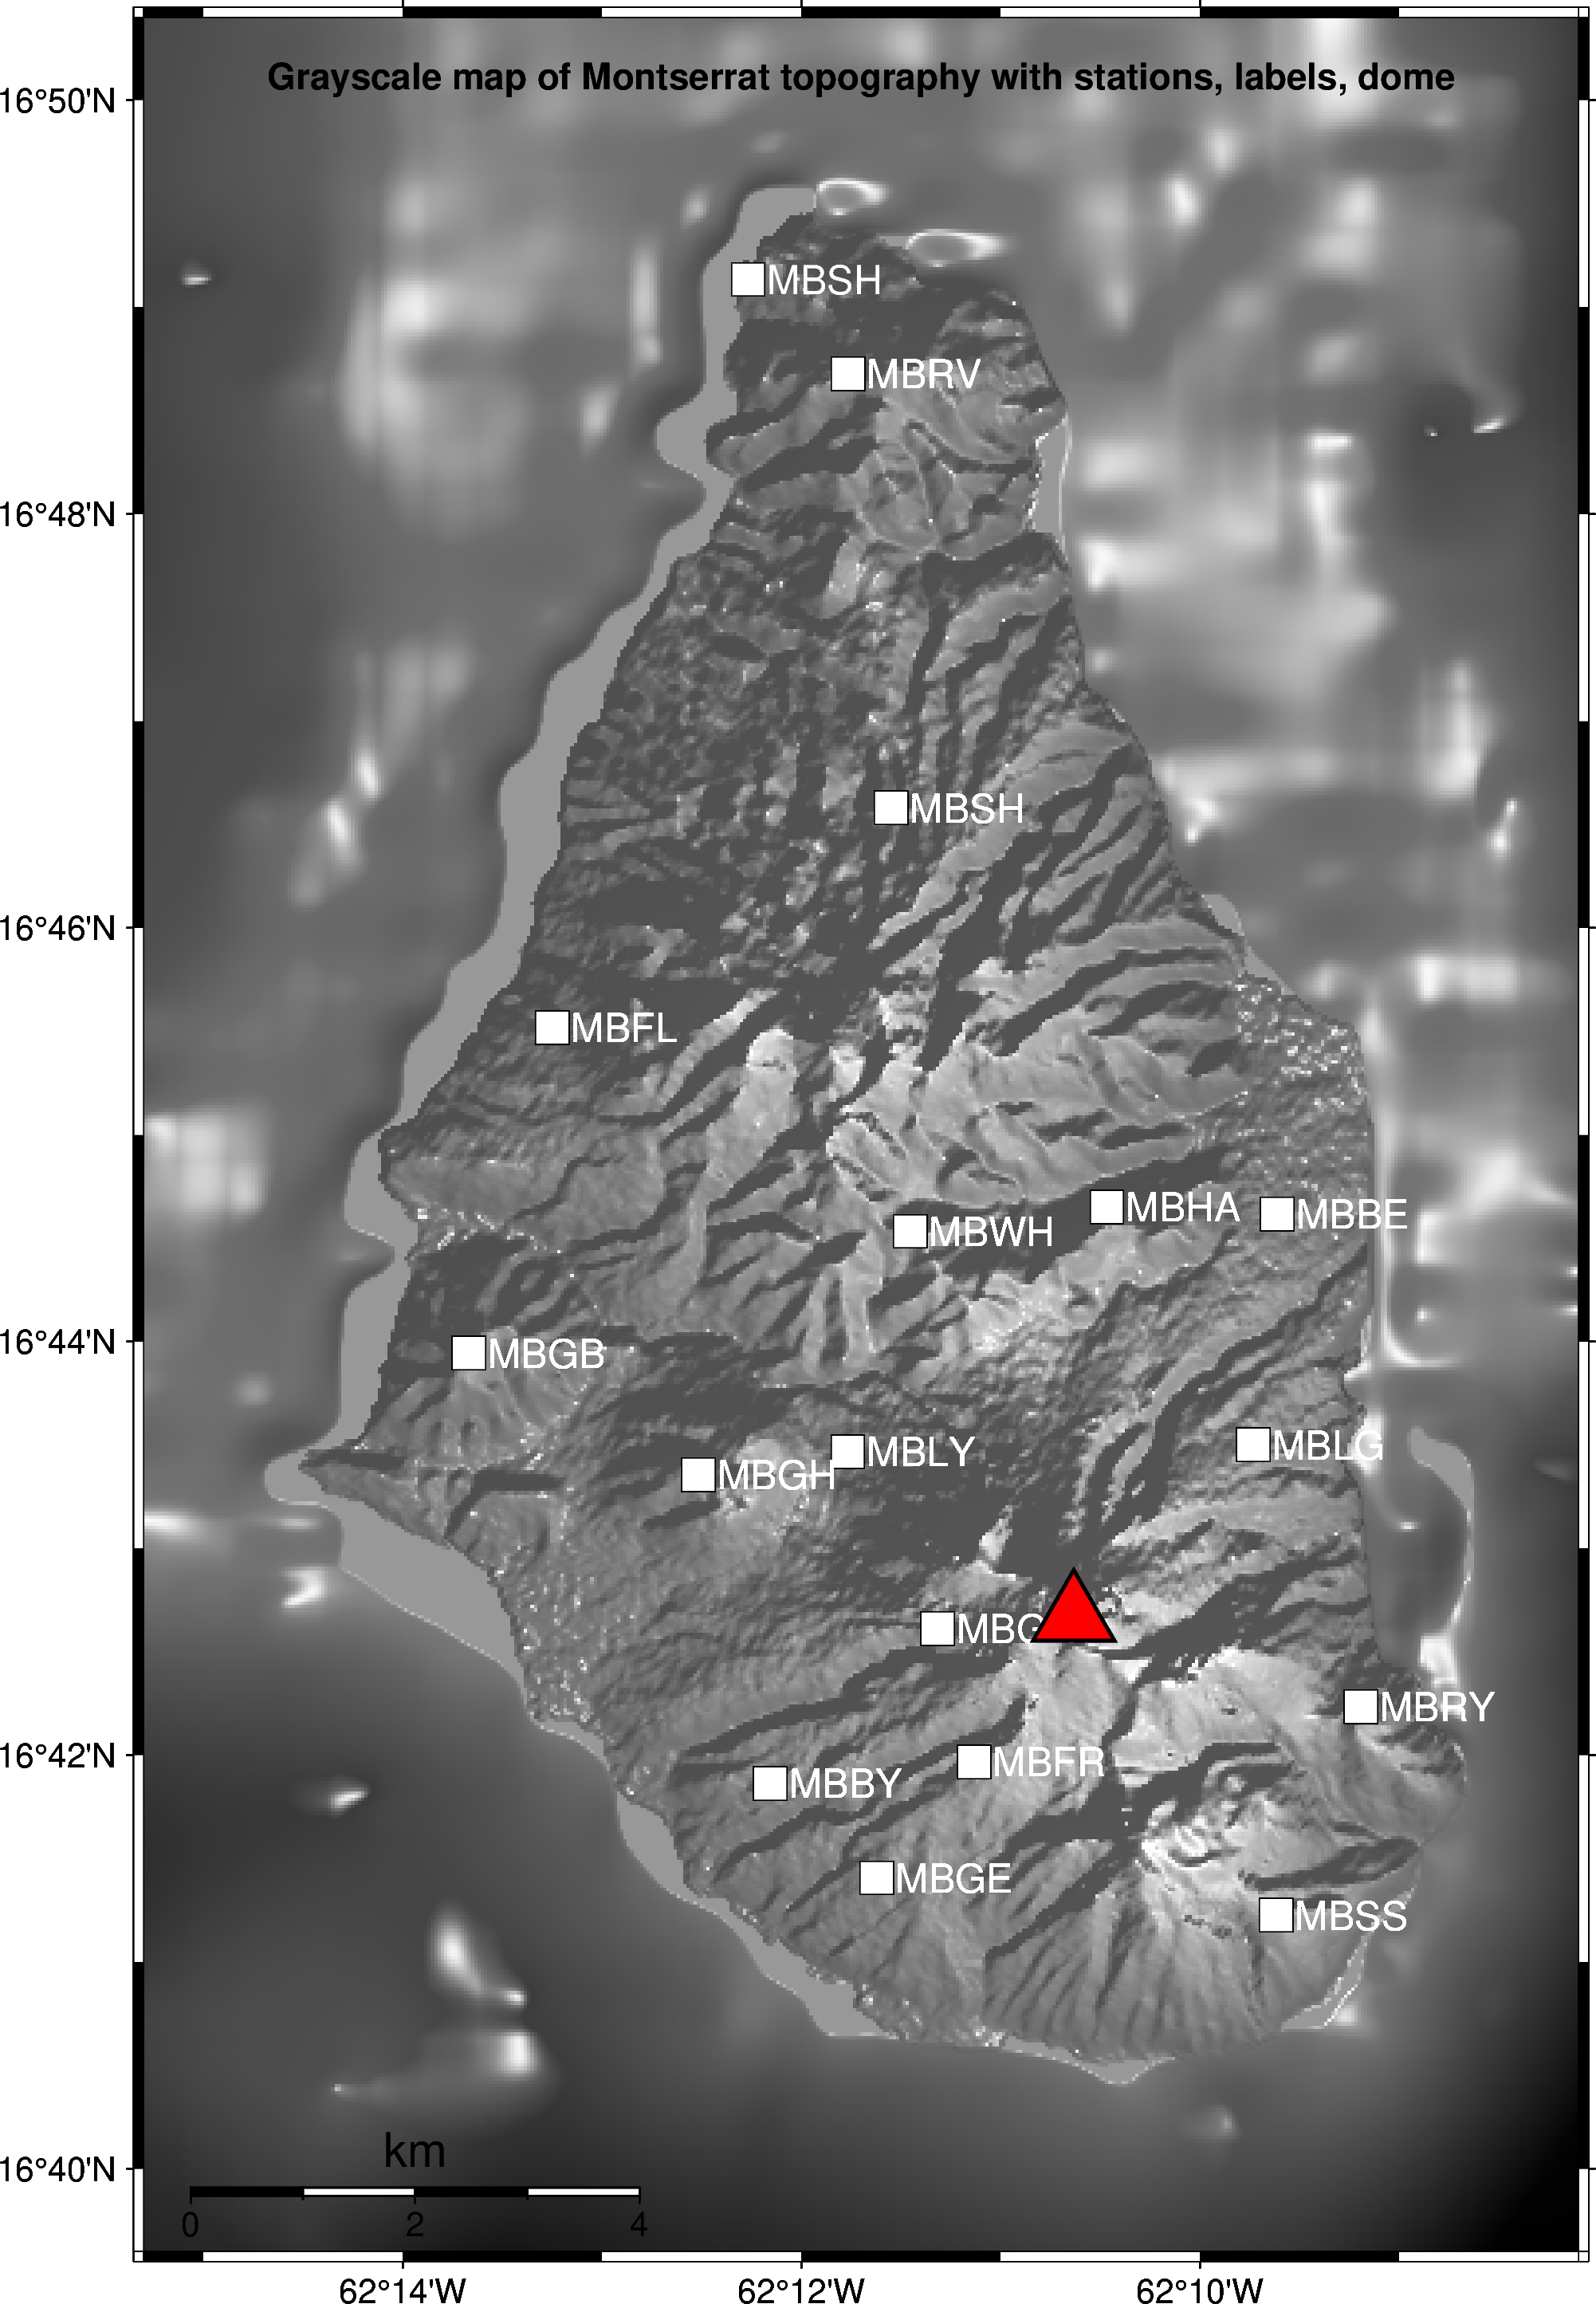

In [7]:
fig = topo_map(
    show=True,
    region=REGION_DEFAULT,
    title="Grayscale map of Montserrat topography with stations, labels, dome",
    add_topography=True,
    inv = INV,
    dome_location=dome_location,
    add_labels=True,
    cmap='gray',
)

## 2.6 Use a custom DEM
Let's use a GeoTIFF of a 1999 Montserrat DEM

In [ ]:
fig = topo_map(
    show=True,
    region=REGION_DEFAULT,
    title="Grayscale map of Montserrat topography with stations, labels, dome",
    add_topography=True,
    inv = INV,
    dome_location=dome_location,
    add_labels=True,
    cmap='gray',
    dem_tif=DEM_DEFAULT,
)

## 2.7 Saving a map plot
To save a map, use the outfile parameter. Just pass an outfile= argument

In [ ]:
fig = topo_map(
    region=REGION_DEFAULT,
    title="Grayscale map of Montserrat topography with stations, labels, dome",
    add_topography=True,
    inv = INV,
    dome_location=dome_location,
    add_labels=True,
    cmap='gray',
    dem_tif=DEM_DEFAULT,
    outfile=str(DEM_DEFAULT).replace('.tif', "_topo_map.png")
)

# 3. Shifting a DEM
There seem to be some alignment problems between PyGMT coastline data, EarthRelief 01s data, Montserrat DEMs, and Montserrat station coordinates.
This code can be used to shift a DEM and save it under a new name.

In [ ]:
# Example: shift 100 m north (in UTM)
#DEM_SHIFTED = Path("/Users/glennthompson/Dropbox/PROFESSIONAL/DATA/wadgeDEMs/auto_crs_fit_v2/wgs84_s0.4_3_clean_shifted.tif")
DEM_SHIFTED = Path(PROJECTDIR) / "wgs84_s0.4_3_clean_shifted.tif"
from flovopy.dem.utils import shift_geotiff
shift_geotiff(DEM_TIF_FOR_BMAP, DEM_SHIFTED, dx=0.0, dy=-16.0)